### Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('./cleaned_house_data.csv')
df.head()

,Unnamed: 0,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,1,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,2,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,3,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,4,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)
df

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1453,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1454,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1455,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [5]:
df.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=287)

Target Column: (property sale price or log property sale price)

### Creating feature and target arrays

In [21]:
X = df.drop(['Property_Sale_Price_natural_log','Property_Sale_Price'], axis=1).values
y = df['Property_Sale_Price'].values
log_y = df['Property_Sale_Price_natural_log'].values

#### Print the type to confirm that it is a numpy array

In [15]:
type(X), type(y), type(log_y)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

### Making predictions from a single feature

In [16]:
X_lotArea = X[:, 2]
print(y.shape, X_lotArea.shape, log_y.shape)

(1457,) (1457,) (1457,)


but our features must be formatted as a two-dimensional array to be accepted by scikit-learn. To convert the shape of X_bmi we apply NumPy's dot-reshape method, passing minus one followed by one. Printing the shape again shows X_bmi is now the correct shape for our model.

In [17]:
X_lotArea = X_lotArea.reshape(-1, 1)
X_lotArea.shape

(1457, 1)

In [18]:
X_lotArea

array([[ 8450.],
       [ 9600.],
       [11250.],
       ...,
       [ 9042.],
       [ 9717.],
       [ 9937.]])

### Plotting

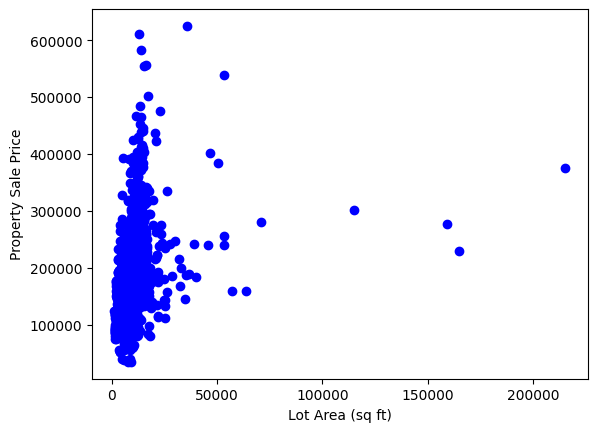

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_lotArea, y, color='blue')
plt.ylabel("Property Sale Price")
plt.xlabel("Lot Area (sq ft)")
plt.show()

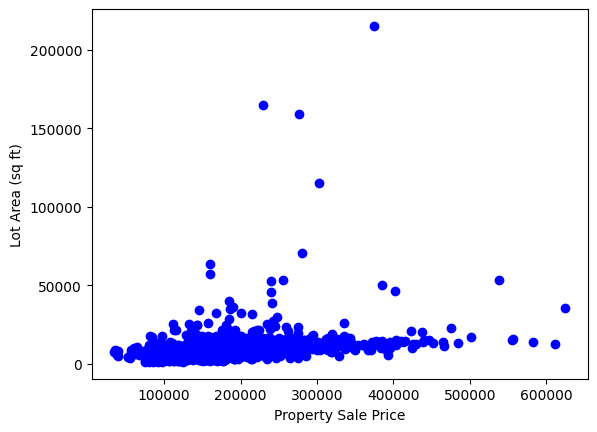

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y, X_lotArea,  color='blue')
plt.ylabel("Lot Area (sq ft)")
plt.xlabel("Property Sale Price")
plt.show()

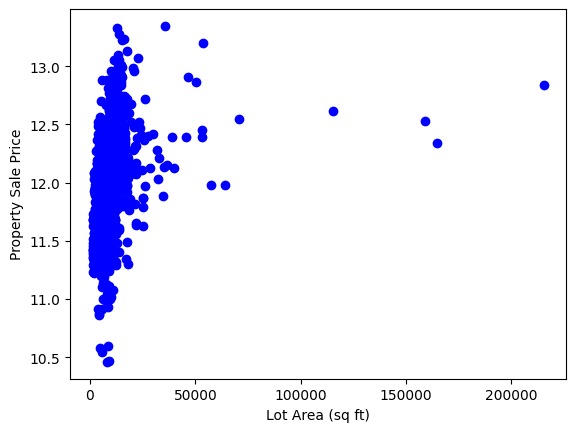

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X_lotArea, log_y, color='blue')
plt.ylabel("Property Sale Price")
plt.xlabel("Lot Area (sq ft)")
plt.show()

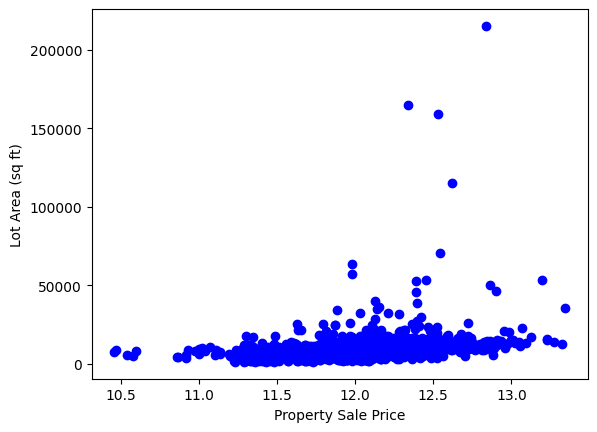

In [23]:
import matplotlib.pyplot as plt
plt.scatter(log_y, X_lotArea,  color='blue')
plt.ylabel("Lot Area (sq ft)")
plt.xlabel("Property Sale Price")
plt.show()

### Fitting a regression model

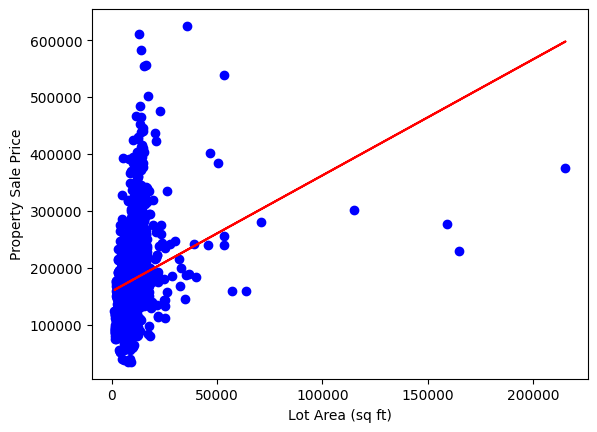

In [26]:
reg = LinearRegression()

reg.fit(X_lotArea, y)
predicitions = reg.predict(X_lotArea)

# Create scatter plot
plt.scatter(X_lotArea, y, color="blue")

# Create Line plot
plt.plot(X_lotArea, predicitions, color='red')
plt.ylabel("Property Sale Price")
plt.xlabel("Lot Area (sq ft)")

plt.show()


### Making predictions from another single feature

In [31]:
X_Dwell_Type = X[:, 1]
print(y.shape, X_Dwell_Type.shape, log_y.shape)

(1457,) (1457,) (1457,)


In [32]:
X_Dwell_Type = X_Dwell_Type.reshape(-1, 1)
X_Dwell_Type.shape

(1457, 1)

In [33]:
X_Dwell_Type

array([[65.],
       [80.],
       [68.],
       ...,
       [66.],
       [68.],
       [75.]])

### Plotting

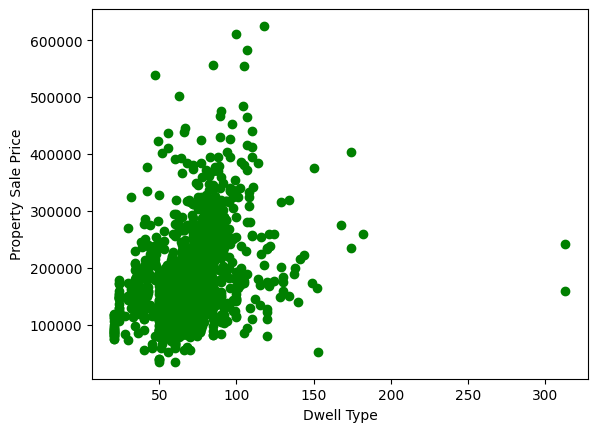

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X_Dwell_Type, y, color='green')
plt.ylabel("Property Sale Price")
plt.xlabel("Dwell Type")
plt.show()

### Fitting a regression model

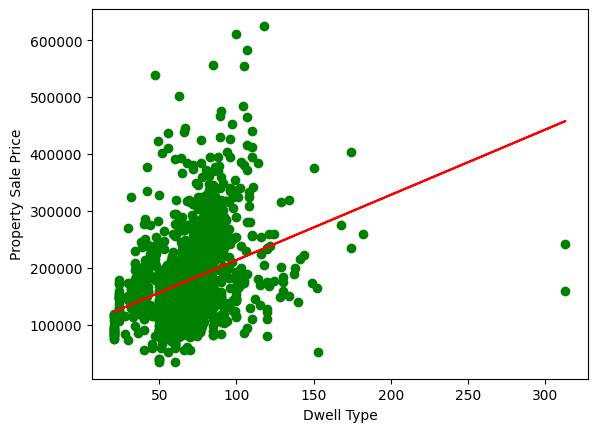

In [37]:
reg = LinearRegression()

reg.fit(X_Dwell_Type, y)
predicitions = reg.predict(X_Dwell_Type)

# Create scatter plot
plt.scatter(X_Dwell_Type, y, color="green")

# Create Line plot
plt.plot(X_Dwell_Type, predicitions, color='red')
plt.ylabel("Property Sale Price")
plt.xlabel("Dwell Type")

plt.show()

### Linear Regression using all features

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

#### R-squared in scikit-learn

In [39]:
reg_all.score(X_test, y_test)

0.804730263924994

#### RMSE in scikit-learn

In [41]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

33977.48524090033

### Cross-Validation

In [42]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
cv_results

array([ 8.72088617e-01,  6.22588613e-01,  6.27020994e-01,  8.77895253e-01,
        8.88779671e-01, -8.26044744e+03])

In [43]:
np.mean(cv_results), np.std(cv_results)

(-1376.0931778677484, 3078.776824534761)

In [44]:
np.quantile(cv_results, [0.025, 0.0975])

array([-7227.81368673, -4233.17580123])

### Regularized regression
#### Ridge regression

In [45]:
from sklearn.linear_model import Ridge
scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

scores

[0.8075834603493198,
 0.8211645079164509,
 0.8385768935622397,
 0.8235646006506145,
 0.7753718791834086]

#### Lasso regression

In [46]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

scores

c:\Users\SONY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.852e+11, tolerance: 5.965e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\SONY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e+11, tolerance: 5.965e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\SONY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

[0.8036923144830278,
 0.8105909677757747,
 0.8125422645152724,
 0.8150433480744639,
 0.8179314863438019]

### Lasso for feature selection in scikit-learn
- Lasso can select important features of a dataset
- Shrinks the coefficients of less important features to zero
- Features not shrunk to zero are selected by lasso

c:\Users\SONY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.873e+11, tolerance: 8.559e+08
  model = cd_fast.enet_coordinate_descent(


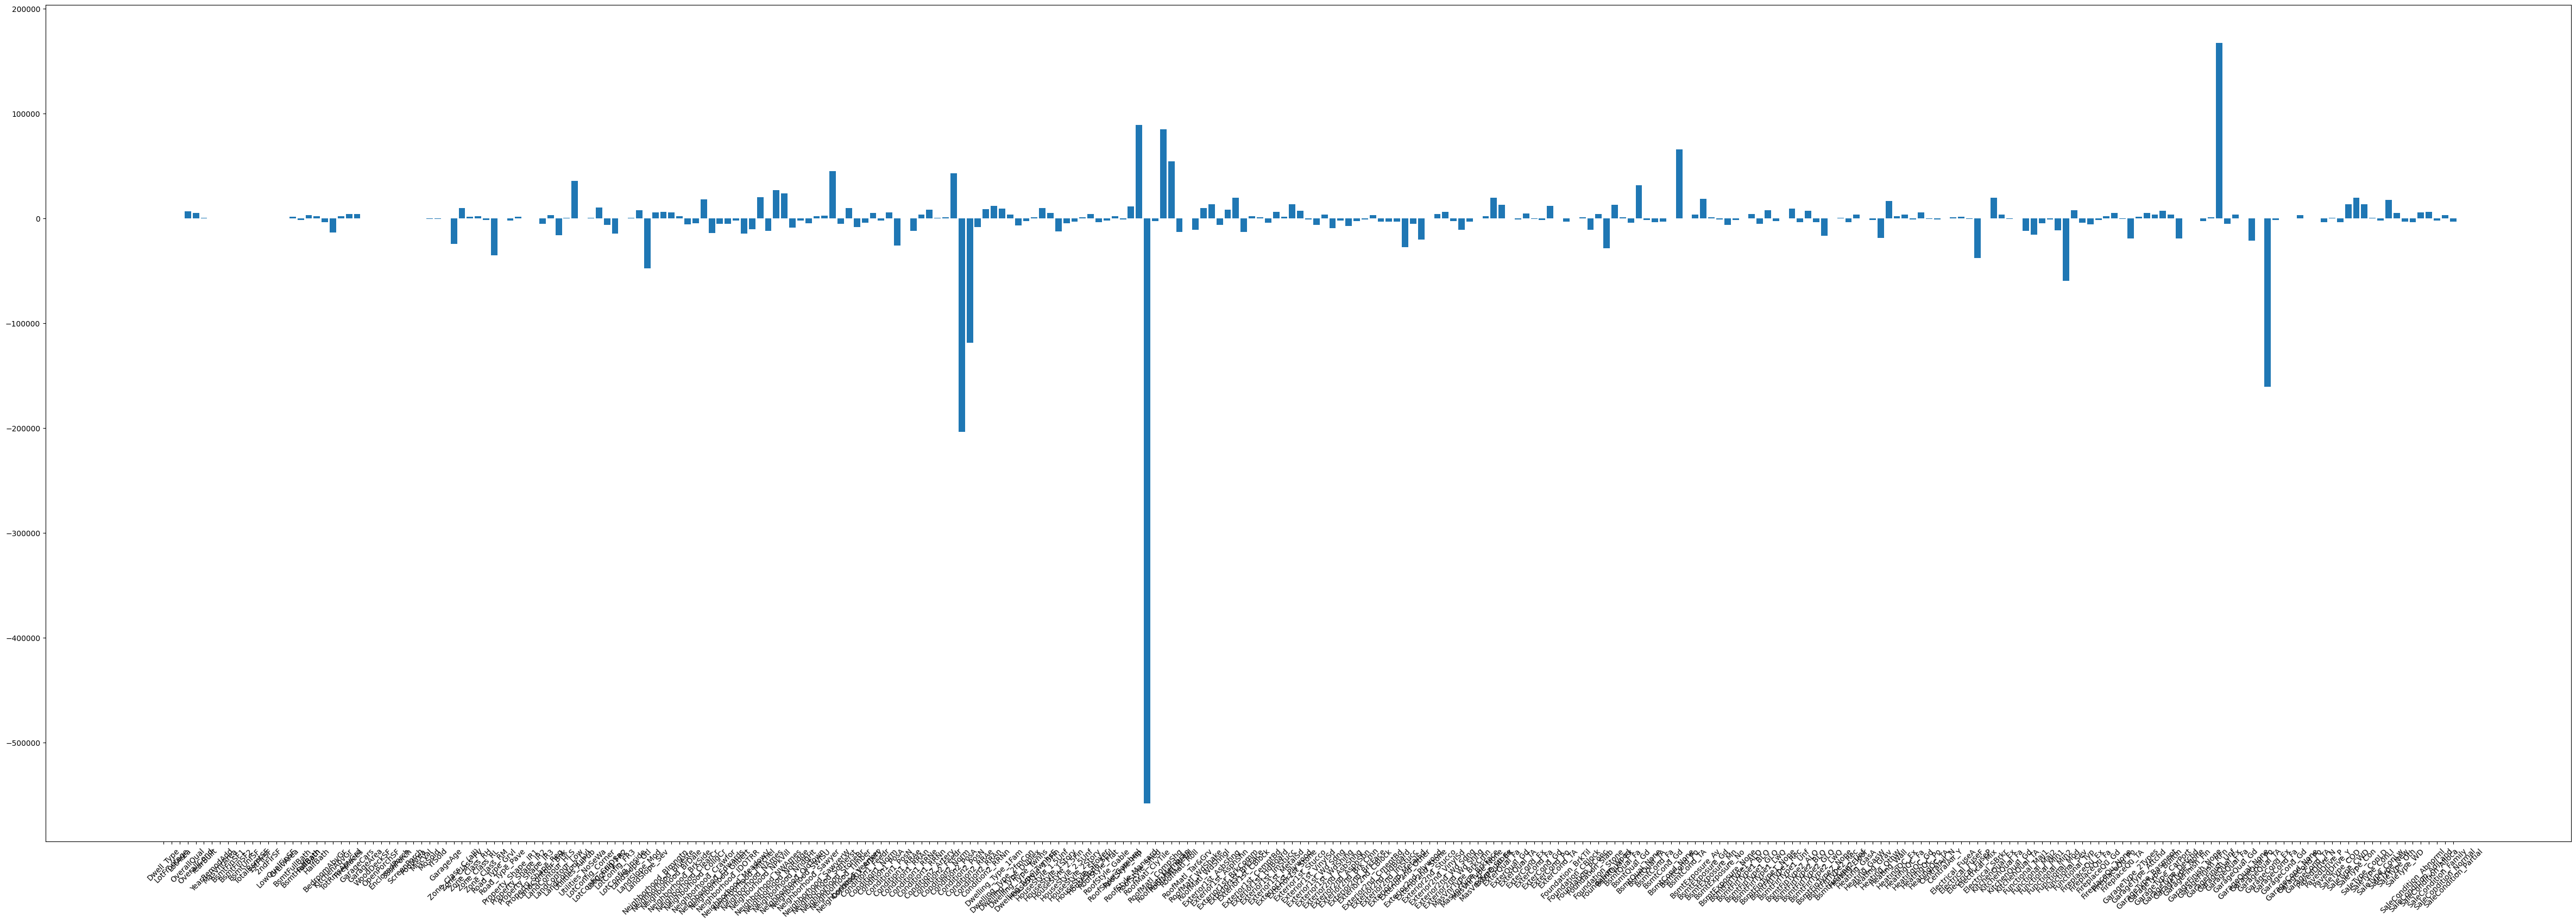

In [54]:
from sklearn.linear_model import Lasso
# X = df.drop("glucose", axis=1).values
# y = df["glucose"].values

names = df.drop(['Property_Sale_Price_natural_log','Property_Sale_Price'], axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

# Create the plot
plt.figure(figsize=(60,20))
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [57]:
names.shape

(285,)

In [58]:
lasso_coef.shape

(285,)

In [59]:
lasso_output = pd.DataFrame({'names': names, 'lasso_coef': lasso_coef})
lasso_output

,names,lasso_coef
0,Dwell_Type,-53.801136
1,LotFrontage,29.848063
2,LotArea,0.831113
3,OverallQual,6834.588701
4,OverallCond,5224.556049
...,...,...
280,SaleCondition_AdjLand,5734.856687
281,SaleCondition_Alloca,5965.730199
282,SaleCondition_Family,-2285.347122
283,SaleCondition_Normal,3100.871715
